# Agenda:

# 1.Marketing team

#  2.Data science process

# organization’s business climate and goals :

The major features we found effect on customer to buy or not buy is the current_price and country and regular_price features 



In [3]:

import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import cov
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # setting seaborn default for plots
%matplotlib inline

In [4]:
df=pd.read_csv('full_gen_data.csv') 

In [5]:
df.head(500)

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0
5,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,1
6,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0
7,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,1
8,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0
9,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",men,139,137,137,205,155,155,1


In [6]:
df.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')

In [7]:
df.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.781800,52.391200,28.290800,0.545646,0.061900,0.004900,2721.726500,6.517000,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,87.934743,35.272128,22.578343,0.194363,0.240975,0.069829,1908.085499,3.914728,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,1.000000,1.290000,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,1017.000000,2.290000,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,26.000000,40.950000,20.950000,0.525044,0.000000,0.000000,2091.000000,6.950000,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,64.000000,79.950000,37.950000,0.699248,0.000000,0.000000,4570.250000,9.600000,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000
max,898.000000,197.950000,195.950000,1.000000,1.000000,1.000000,5999.000000,13.290000,205.000000,238.000000,250.000000,255.000000,211.000000,255.000000,1.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
country           100000 non-null object
article           100000 non-null object
sales             100000 non-null int64
regular_price     100000 non-null float64
current_price     100000 non-null float64
ratio             100000 non-null float64
retailweek        100000 non-null object
promo1            100000 non-null int64
promo2            100000 non-null int64
customer_id       100000 non-null float64
article.1         100000 non-null object
productgroup      100000 non-null object
category          100000 non-null object
cost              100000 non-null float64
style             100000 non-null object
sizes             100000 non-null object
gender            100000 non-null object
rgb_r_main_col    100000 non-null int64
rgb_g_main_col    100000 non-null int64
rgb_b_main_col    100000 non-null int64
rgb_r_sec_col     100000 non-null int64
rgb_g_sec_col     100000 non-nu

# Check if there any null data

In [9]:
df.isnull().values.any()

False

In [10]:
df['label'].value_counts()

0    86072
1    13928
Name: label, dtype: int64

# The problem here is Imbalanced Data set lead to biased to the majority class

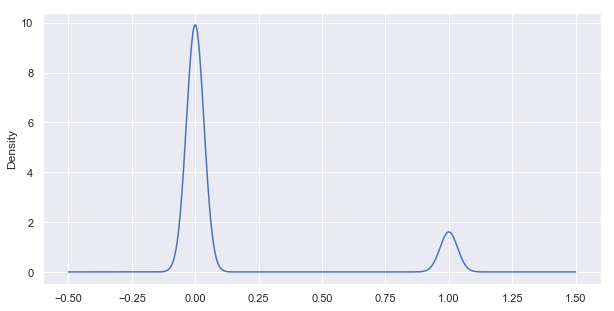

In [11]:
df['label'].plot(kind="density", figsize=(10,5))


In [12]:
CostomerBuy = df[df['label']==1]['gender'].value_counts()
CostomerNotBuy =df[df['label']==0]['gender'].value_counts()
df1 = pd.DataFrame([CostomerBuy,CostomerNotBuy])
df[["gender", "label"]].groupby(['gender'], as_index=False).mean().sort_values(by='label', ascending=False)

,gender,label
2,unisex,0.142600
3,women,0.139286
0,kids,0.137600
1,men,0.137600


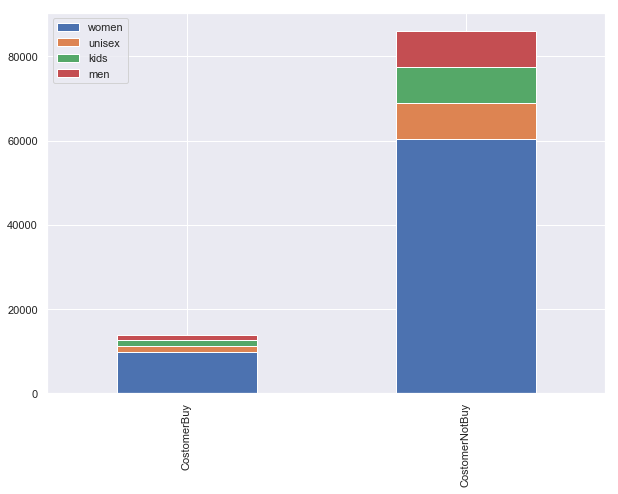

In [13]:
df1.index = ['CostomerBuy','CostomerNotBuy']
df1.plot(kind='bar',stacked=True, figsize=(10,7))

In [14]:
CostomerBuy = df[df['label']==1]['country'].value_counts()
CostomerNotBuy =df[df['label']==0]['country'].value_counts()
df2 = pd.DataFrame([CostomerBuy,CostomerNotBuy])
df[["country", "label"]].groupby(['country'], as_index=False).mean().sort_values(by='label', ascending=False)

,country,label
0,Austria,0.143540
2,Germany,0.138401
1,France,0.132406


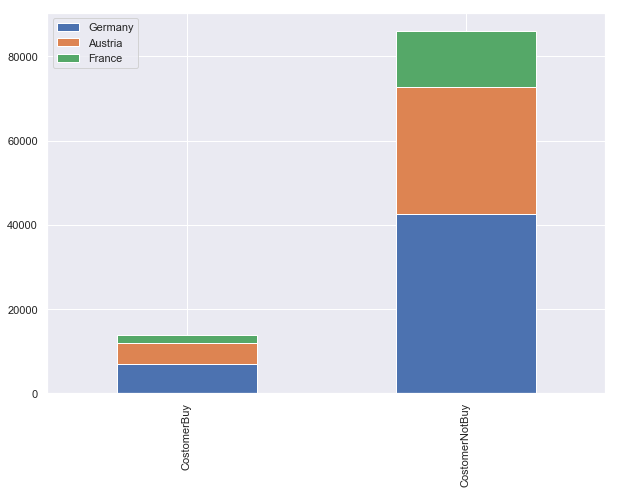

In [15]:
df2.index = ['CostomerBuy','CostomerNotBuy']
df2.plot(kind='bar',stacked=True, figsize=(10,7))

In [16]:

df[["style", "label"]].groupby(['style'], as_index=False).mean().sort_values(by='label', ascending=False)

,style,label
0,regular,0.139740
1,slim,0.138900
2,wide,0.138767


In [17]:

df[["category", "label"]].groupby(['category'], as_index=False).mean().sort_values(by='label', ascending=False)

,category,label
3,RELAX CASUAL,0.146700
1,GOLF,0.141700
0,FOOTBALL GENERIC,0.140100
4,RUNNING,0.138650
5,TRAINING,0.137367
2,INDOOR,0.134800


In [18]:

df[["productgroup", "label"]].groupby(['productgroup'], as_index=False).mean().sort_values(by='label', ascending=False)

,productgroup,label
0,HARDWARE ACCESSORIES,0.140700
1,SHOES,0.139567
3,SWEATSHIRTS,0.138900
2,SHORTS,0.135100


In [19]:
df[["article.1", "label"]].groupby(['article.1'], as_index=False).mean().sort_values(by='label', ascending=False)

,article.1,label
4,GG8661,0.1467
7,PC6383,0.1426
2,CB8861,0.1417
3,FG2965,0.1397
8,TX1463,0.1389
6,OC6355,0.1381
0,AC7347,0.1376
5,LI3529,0.1376
1,AP5568,0.1351
9,VT7698,0.1348


In [20]:
df_retailweek=df[["retailweek", "label"]].groupby(['retailweek'], as_index=False).mean().sort_values(by='label', ascending=False)

In [21]:
#plt.plot(df_retailweek['retailweek'], df_retailweek['label'])


In [22]:
def Find_retailweektoSale(num):
    Find_retailweektoSale=[]
    select_indices = list(np.where(df_retailweek["label"] >num)[0])
    for i in range(len(select_indices)):
        Find_retailweektoSale.append(df_retailweek['retailweek'].iloc[select_indices[i]])
        
    return Find_retailweektoSale

In [23]:
Find_retailweektoSale(.3)  #months (1,2,7,8)

['2017-01-22',
 '2015-08-02',
 '2016-07-31',
 '2016-01-24',
 '2015-01-25',
 '2015-08-16',
 '2016-08-07',
 '2016-07-24',
 '2015-02-15',
 '2015-08-09',
 '2017-02-05',
 '2016-01-31',
 '2015-01-18',
 '2015-02-01',
 '2016-02-07',
 '2015-07-26',
 '2016-07-17',
 '2015-02-08',
 '2015-07-19',
 '2017-01-29',
 '2016-02-14',
 '2016-08-14']

In [24]:
df['retailweek'] = pd.to_datetime(df.retailweek)
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [25]:
df.dtypes

country                   object
article                   object
sales                      int64
regular_price            float64
current_price            float64
ratio                    float64
retailweek        datetime64[ns]
promo1                     int64
promo2                     int64
customer_id              float64
article.1                 object
productgroup              object
category                  object
cost                     float64
style                     object
sizes                     object
gender                    object
rgb_r_main_col             int64
rgb_g_main_col             int64
rgb_b_main_col             int64
rgb_r_sec_col              int64
rgb_g_sec_col              int64
rgb_b_sec_col              int64
label                      int64
dtype: object

In [26]:
df['month'] = df.retailweek.dt.month

In [27]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,month
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,3
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,3
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,3
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,3
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,3


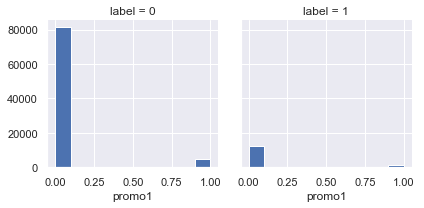

In [28]:
g = sns.FacetGrid(df, col='label')
g.map(plt.hist, 'promo1', bins=10)

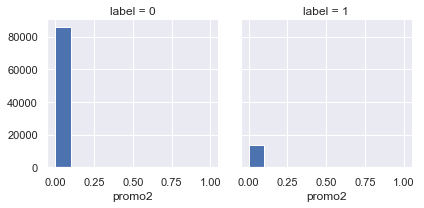

In [29]:
g = sns.FacetGrid(df, col='label')
g.map(plt.hist, 'promo2', bins=10)

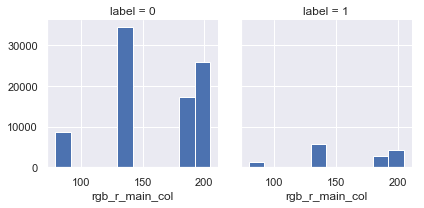

In [30]:
g = sns.FacetGrid(df, col='label')
g.map(plt.hist, 'rgb_r_main_col', bins=10)

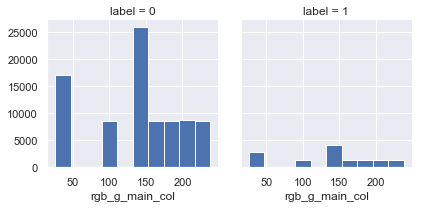

In [31]:
g = sns.FacetGrid(df, col='label')
g.map(plt.hist, 'rgb_g_main_col', bins=10)

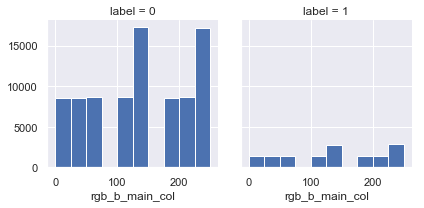

In [32]:
g = sns.FacetGrid(df, col='label')
g.map(plt.hist, 'rgb_b_main_col', bins=10)

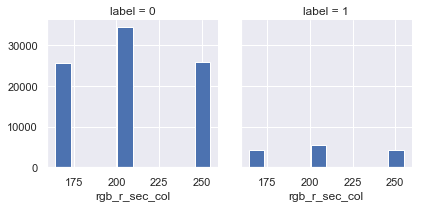

In [33]:

g = sns.FacetGrid(df, col='label')
g.map(plt.hist, 'rgb_r_sec_col', bins=10)

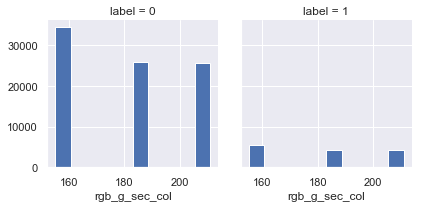

In [34]:

g = sns.FacetGrid(df, col='label')
g.map(plt.hist, 'rgb_g_sec_col', bins=10)

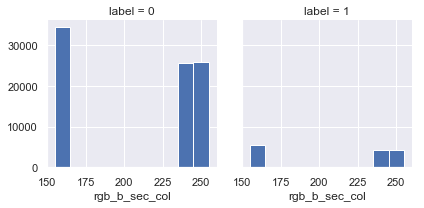

In [35]:

g = sns.FacetGrid(df, col='label')
g.map(plt.hist, 'rgb_b_sec_col', bins=10)

# Feature engineering

In [36]:
#df['rgb_main_col']=df.iloc[:,-8:-5].sum(axis=1)
#df['rgb_sec_col']=df.iloc[:,-5:-2].sum(axis=1)
#df=df.drop(columns=['rgb_r_main_col','rgb_g_main_col','rgb_b_main_col','rgb_r_sec_col','rgb_g_sec_col','rgb_b_sec_col'])
df=df.drop(columns=['sizes']) # does not main dependancy factor regarding to the gender
df=df.drop(columns=['retailweek']) 


In [37]:
df

,country,article,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,article.1,...,style,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,month
0,Germany,YN8639,28,5.95,3.95,0.663866,0,0,1003.0,OC6355,...,slim,women,205,104,57,255,187,255,0,3
1,Germany,YN8639,28,5.95,3.95,0.663866,0,0,1003.0,AP5568,...,regular,women,188,238,104,255,187,255,0,3
2,Germany,YN8639,28,5.95,3.95,0.663866,0,0,1003.0,CB8861,...,regular,women,205,173,0,255,187,255,0,3
3,Germany,YN8639,28,5.95,3.95,0.663866,0,0,1003.0,LI3529,...,regular,kids,205,140,149,164,211,238,0,3
4,Germany,YN8639,28,5.95,3.95,0.663866,0,0,1003.0,GG8661,...,regular,women,138,43,226,164,211,238,0,3
5,Germany,YN8639,28,5.95,3.95,0.663866,0,0,1003.0,TX1463,...,wide,women,79,148,205,164,211,238,1,3
6,Germany,YN8639,28,5.95,3.95,0.663866,0,0,1003.0,PC6383,...,wide,unisex,139,26,26,205,155,155,0,3
7,Germany,YN8639,28,5.95,3.95,0.663866,0,0,1003.0,VT7698,...,wide,women,135,206,250,205,155,155,1,3
8,Germany,YN8639,28,5.95,3.95,0.663866,0,0,1003.0,FG2965,...,slim,women,181,181,181,205,155,155,0,3
9,Germany,YN8639,28,5.95,3.95,0.663866,0,0,1003.0,AC7347,...,regular,men,139,137,137,205,155,155,1,3


In [38]:
#g = sns.FacetGrid(df, col='label')
#g.map(plt.hist, 'rgb_main_col', bins=10)

In [39]:
#g = sns.FacetGrid(df, col='label')
#g.map(plt.hist, 'rgb_sec_col', bins=10)

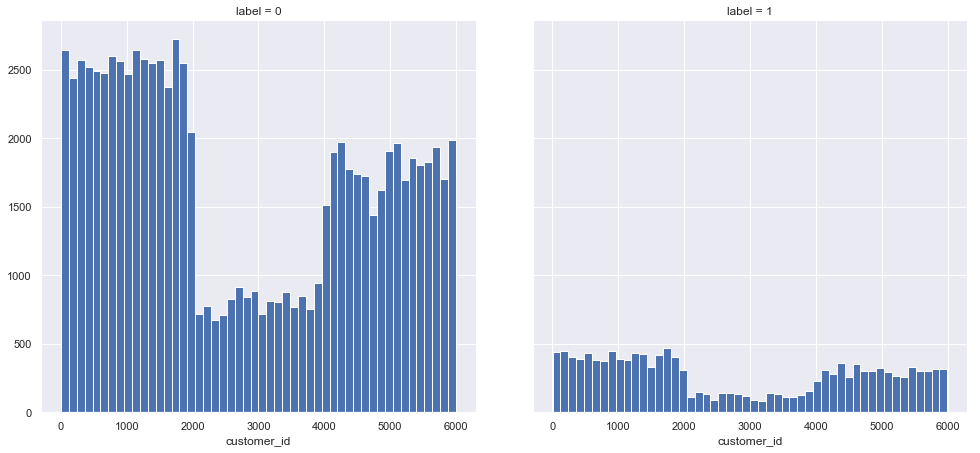

In [40]:
g = sns.FacetGrid(df, col='label')
g.map(plt.hist, 'customer_id', bins=50)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

#  Label Encoding


In [41]:
#X_train_df = pd.get_dummies(df_trainData, columns=['country'])
df.replace({"Germany": 0, "Austria": 1,"France":2}, inplace=True)
df.replace({"women": 0, "kids": 1,"unisex":2,"men":3}, inplace=True)
df.replace({"slim": 0, "regular": 1,"wide":2}, inplace=True)
df.replace({"RELAX CASUAL": 0, "GOLF": 1,"FOOTBALL GENERIC":2,"RUNNING":3,"TRAINING":4,"INDOOR":5}, inplace=True)
df.replace({"HARDWARE ACCESSORIES": 0, "SHOES": 1,"SWEATSHIRTS":2,"SHORTS":3}, inplace=True)
df.replace({"GG8661": 0, "PC6383": 1,"CB8861":2,"FG2965":3,"TX1463": 4, "OC6355": 5,"AC7347":6,"LI3529":7, "OC6355": 5,"AP5568":8,"VT7698":9}, inplace=True)

In [42]:
df=df.drop(columns=['article'])

In [43]:
df


,country,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,article.1,productgroup,...,style,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,month
0,0,28,5.95,3.95,0.663866,0,0,1003.0,5,1,...,0,0,205,104,57,255,187,255,0,3
1,0,28,5.95,3.95,0.663866,0,0,1003.0,8,3,...,1,0,188,238,104,255,187,255,0,3
2,0,28,5.95,3.95,0.663866,0,0,1003.0,2,0,...,1,0,205,173,0,255,187,255,0,3
3,0,28,5.95,3.95,0.663866,0,0,1003.0,7,1,...,1,1,205,140,149,164,211,238,0,3
4,0,28,5.95,3.95,0.663866,0,0,1003.0,0,1,...,1,0,138,43,226,164,211,238,0,3
5,0,28,5.95,3.95,0.663866,0,0,1003.0,4,2,...,2,0,79,148,205,164,211,238,1,3
6,0,28,5.95,3.95,0.663866,0,0,1003.0,1,1,...,2,2,139,26,26,205,155,155,0,3
7,0,28,5.95,3.95,0.663866,0,0,1003.0,9,1,...,2,0,135,206,250,205,155,155,1,3
8,0,28,5.95,3.95,0.663866,0,0,1003.0,3,0,...,0,0,181,181,181,205,155,155,0,3
9,0,28,5.95,3.95,0.663866,0,0,1003.0,6,1,...,1,3,139,137,137,205,155,155,1,3


# Handle Imbalanced Dataset

In [44]:
df_trainData=df.drop(columns=['label'])
df_Label=df['label']

In [45]:
from imblearn.under_sampling import NearMiss # doctest: +NORMALIZE_WHITESPACE


Using TensorFlow backend.


In [46]:
#!pip install imblearn  
#!pip install -U scikit-learn


In [47]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_sample(df_trainData,df_Label)

In [48]:
X_res.shape,y_res.shape

((27856, 21), (27856,))

In [49]:
y_res.value_counts()

1    13928
0    13928
Name: label, dtype: int64

In [50]:
X_res.head()

,country,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,article.1,productgroup,...,cost,style,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,month
0,0,4,62.95,42.95,0.682288,0,0,112.0,8,3,...,2.29,1,0,188,238,104,255,187,255,1
1,0,6,24.95,19.95,0.799599,0,0,495.0,2,0,...,1.70,1,0,205,173,0,255,187,255,7
2,0,8,23.95,15.95,0.665971,0,0,1012.0,8,3,...,2.29,1,0,188,238,104,255,187,255,1
3,0,8,23.95,18.95,0.791232,0,0,1682.0,5,1,...,13.29,0,0,205,104,57,255,187,255,2
4,0,6,23.95,20.95,0.874739,0,0,495.0,9,1,...,5.20,2,0,135,206,250,205,155,155,8


In [51]:
y_res=pd.DataFrame(y_res)

In [52]:
y_res.head()

,label
0,0
1,0
2,0
3,0
4,0


In [53]:
df_trainData.columns

Index(['country', 'sales', 'regular_price', 'current_price', 'ratio', 'promo1',
       'promo2', 'customer_id', 'article.1', 'productgroup', 'category',
       'cost', 'style', 'gender', 'rgb_r_main_col', 'rgb_g_main_col',
       'rgb_b_main_col', 'rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col',
       'month'],
      dtype='object')

In [54]:
df_balance=pd.concat([X_res,y_res], axis=1, join='outer', ignore_index=False)

In [55]:
df_balance.head()

,country,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,article.1,productgroup,...,style,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,month,label
0,0,4,62.95,42.95,0.682288,0,0,112.0,8,3,...,1,0,188,238,104,255,187,255,1,0
1,0,6,24.95,19.95,0.799599,0,0,495.0,2,0,...,1,0,205,173,0,255,187,255,7,0
2,0,8,23.95,15.95,0.665971,0,0,1012.0,8,3,...,1,0,188,238,104,255,187,255,1,0
3,0,8,23.95,18.95,0.791232,0,0,1682.0,5,1,...,0,0,205,104,57,255,187,255,2,0
4,0,6,23.95,20.95,0.874739,0,0,495.0,9,1,...,2,0,135,206,250,205,155,155,8,0


# Visulise our data After balance

In [56]:
CostomerBuy = df_balance[df_balance['label']==1]['gender'].value_counts()
CostomerNotBuy =df_balance[df_balance['label']==0]['gender'].value_counts()
df_balance1 = pd.DataFrame([CostomerBuy,CostomerNotBuy])
df_balance[["gender", "label"]].groupby(['gender'], as_index=False).mean().sort_values(by='label', ascending=False)

,gender,label
1,1,0.511144
2,2,0.504065
0,0,0.499283
3,3,0.490203


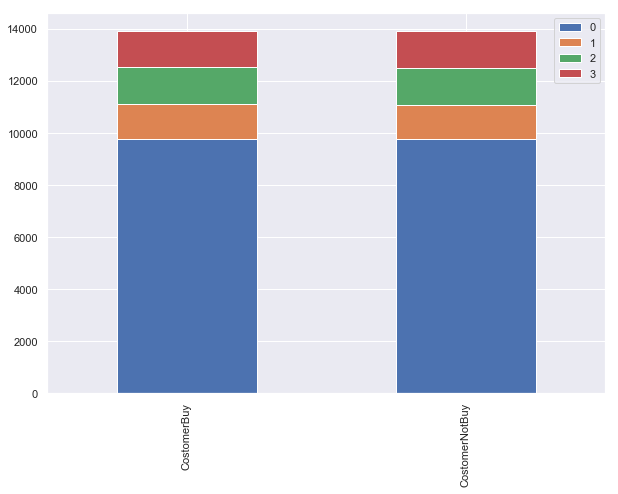

In [57]:
df_balance1.index = ['CostomerBuy','CostomerNotBuy']
df_balance1.plot(kind='bar',stacked=True, figsize=(10,7))

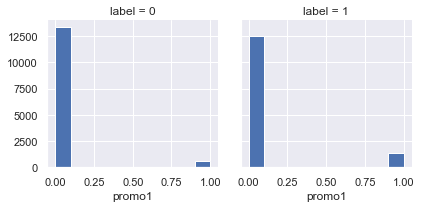

In [58]:
g = sns.FacetGrid(df_balance, col='label')
g.map(plt.hist, 'promo1', bins=10)

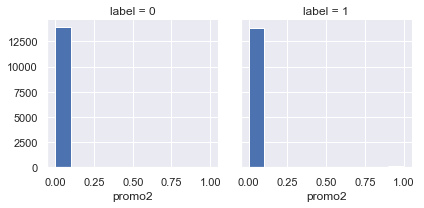

In [59]:
g = sns.FacetGrid(df_balance, col='label')
g.map(plt.hist, 'promo2', bins=10)

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(df_trainData,df_Label,test_size=0.2,random_state=42)
X_trainb,X_testb,Y_trainb,Y_testb=train_test_split(X_res,y_res,test_size=0.1,random_state=42)


In [61]:
X_trainb.shape, X_testb.shape

((25070, 21), (2786, 21))

# Data Scaling


In [62]:
from sklearn.preprocessing import MinMaxScaler
sc_Xb = MinMaxScaler()
X_train_scb = sc_Xb.fit_transform(X_trainb)
X_test_scb = sc_Xb.transform(X_testb)
sc_X = MinMaxScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

# Algorithms Training


In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB 
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import sklearn.ensemble as ens 

# Traning Imbalanced Data

In [101]:

svm_clf = SVC(probability=True)
svm_clf.fit(X_train_sc,Y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [102]:
y_pred=svm_clf.predict(X_test_sc)

In [103]:
confusion_matrix(Y_test, y_pred)   #Biased to majorty class

array([[17189,     0],
       [ 2811,     0]], dtype=int64)

In [104]:
accuracy_score(Y_test, y_pred)

0.85945

In [105]:
f1_score(Y_test, y_pred, average='macro')

0.46220656645782354

# Traning balanced DataSet

# Support Vector Classifier

In [ ]:
#svm_clfb = SVC(probability=True)
#svm_clfb.fit(X_train_scb,Y_trainb)
#svm_parm = {'kernel': ['rbf', 'poly'], 
#            'C': [1, 5, 50, 100, 500, 1000,1500,2000], 
#            'degree': [3, 5, 7], 
#       'gamma':[0.01,0.04,.1,0.2,.3,.4,.6],
#           'random_state': [0,1,2,3,4,5]}

In [ ]:
#clfs_opt = []
#clfs_best_scores = []
#clfs_best_param = []
#for param in ( svm_parm):
#    clf = RandomizedSearchCV(svm_clfb, svm_parm, cv=5)
#    clf.fit(X_train_scb,Y_trainb)
#    clfs_opt.append(clf.best_estimator_)
#    clfs_best_scores.append(clf.best_score_)
#    clfs_best_param.append(clf.best_params_)

In [ ]:
#max(clfs_best_scores)

In [ ]:
#arg = np.argmax(clfs_best_scores)
#clfs_best_param[arg]

In [115]:
svm_clfb = SVC(probability=True,kernel='rbf',random_state= 3, gamma=0.1, degree= 7,C= 100)

In [116]:
svm_clfb.fit(X_train_scb,Y_trainb)

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=7, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=3, shrinking=True, tol=0.001,
    verbose=False)

In [117]:
y_preSVMb=svm_clfb.predict(X_test_scb)

In [118]:
confusion_matrix(Y_testb, y_preSVMb)

array([[1016,  366],
       [ 326, 1078]], dtype=int64)

In [119]:
accuracy_score(Y_testb, y_preSVMb)

0.7516152189519024

In [120]:
f1_score(Y_testb, y_preSVMb, average='macro')

0.7514921463809006

# 2.DecisionTreeClassifier

In [405]:
Dec_clfb = DecisionTreeClassifier(criterion='entropy')
Dec_clfb.fit(X_train_scb,Y_trainb)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [406]:
y_preDecb=Dec_clfb.predict(X_test_scb)

In [407]:
accuracy_score(Y_testb, y_preDecb)

0.7132089016511127

In [408]:
confusion_matrix(Y_testb, y_preDecb)

array([[ 984,  398],
       [ 401, 1003]], dtype=int64)

In [409]:
f1_score(Y_testb, y_preDecb, average='macro')

0.7131955624185475

In [410]:
print(classification_report(Y_testb, y_preDecb))


              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1382
           1       0.72      0.71      0.72      1404

    accuracy                           0.71      2786
   macro avg       0.71      0.71      0.71      2786
weighted avg       0.71      0.71      0.71      2786



In [411]:
Dec_clfb.get_depth()

38

In [412]:
Dec_clfb.get_n_leaves()

6527

In [413]:
from sklearn import tree

[Text(283.871,226.498,'X[4] <= 0.293\nentropy = 1.0\nsamples = 25070\nvalue = [12546, 12524]'),
 Text(283.803,220.615,'entropy = 0.0\nsamples = 3889\nvalue = [3889, 0]'),
 Text(283.939,220.615,'X[1] <= 0.043\nentropy = 0.976\nsamples = 21181\nvalue = [8657, 12524]'),
 Text(223.268,214.732,'X[3] <= 0.173\nentropy = 0.996\nsamples = 18433\nvalue = [8519, 9914]'),
 Text(120.638,208.849,'X[4] <= 0.479\nentropy = 0.988\nsamples = 12804\nvalue = [7211, 5593]'),
 Text(36.7326,202.966,'X[0] <= 0.75\nentropy = 0.784\nsamples = 3407\nvalue = [2611, 796]'),
 Text(19.9945,197.083,'X[4] <= 0.342\nentropy = 0.741\nsamples = 3165\nvalue = [2501, 664]'),
 Text(2.42831,191.2,'X[1] <= 0.03\nentropy = 0.428\nsamples = 537\nvalue = [490, 47]'),
 Text(1.83529,185.317,'X[2] <= 0.255\nentropy = 0.357\nsamples = 458\nvalue = [427, 31]'),
 Text(1.05662,179.434,'X[10] <= 0.1\nentropy = 0.325\nsamples = 438\nvalue = [412, 26]'),
 Text(0.339476,173.551,'X[4] <= 0.321\nentropy = 0.658\nsamples = 47\nvalue = [39, 8

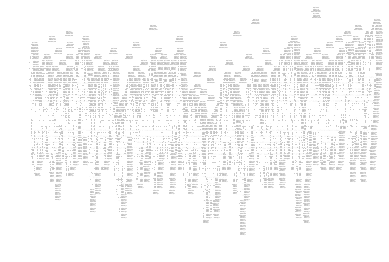

In [414]:
tree.plot_tree(Dec_clfb.fit(X_train_scb,Y_trainb)) 

In [423]:
from sklearn.tree.export import export_text

r = export_text(Dec_clfb)
print(r)

|--- feature_4 <= 0.29
|   |--- class: 0
|--- feature_4 >  0.29
|   |--- feature_1 <= 0.04
|   |   |--- feature_3 <= 0.17
|   |   |   |--- feature_4 <= 0.48
|   |   |   |   |--- feature_0 <= 0.75
|   |   |   |   |   |--- feature_4 <= 0.34
|   |   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |   |--- feature_2 <= 0.26
|   |   |   |   |   |   |   |   |--- feature_10 <= 0.10
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.32
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_4 >  0.32
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.33
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.33
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |--- feature_10 >  0.10
|   |   |   |   |   |   |   |   |   |--- feature_10 <= 0.90
|   |   |   |   |   |   |   |   |   |  

In [415]:
max_depth_range = list(range(5, 15, 2))
min_samples_split = list(range(2, 10, 1))

for k in min_samples_split:
    train_scores, test_scores = validation_curve(DecisionTreeClassifier(min_samples_split=k), X_train_scb,Y_trainb, 
                                                 param_name="max_depth",scoring="f1", param_range=max_depth_range,  cv=10)                                         
                                           
                                                

In [416]:
train_scores = np.mean(train_scores,axis=1)
valid_scores= np.mean(test_scores,axis=1)

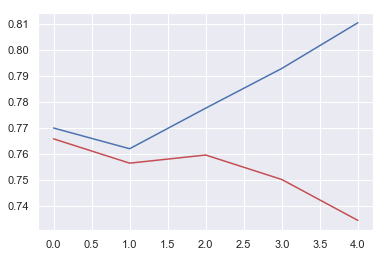

In [417]:
plt.plot(train_scores,color="b")
plt.plot(valid_scores,color="r")     

# 3.KNeighborsClassifier

In [418]:

KNN_clfb = KNeighborsClassifier()
KNN_clfb.fit(X_train_scb,Y_trainb)

C:\Users\Mohammed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [419]:
y_preKNNb=KNN_clfb.predict(X_test_scb)

In [420]:
accuracy_score(Y_testb, y_preKNNb)

0.7106963388370423

# Logistic Regresion

In [107]:
log=LogisticRegression()
param_name = 'C'
param_range =  np.arange(1,100, 3)

train_scores, valid_scores = validation_curve(log,X_train_scb,Y_trainb,param_name=param_name,
                                             param_range=param_range,scoring='accuracy',cv=5)

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase t

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase t

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase t

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase t

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase t

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase t

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase t

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase t

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase t

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

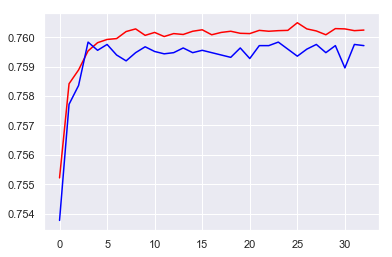

In [108]:
plt.plot(np.mean(train_scores, axis=1),color='red')
plt.plot(np.mean(valid_scores, axis=1),color='blue')

# 4.NaïveBayes classifier

In [121]:
gnb_clf = GaussianNB(priors=None)

In [122]:
gnb_clf.fit(X_train_scb,Y_trainb)

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [123]:
y_prenbb=gnb_clf.predict(X_test_scb)

In [124]:
accuracy_score(Y_testb, y_prenbb)

0.6837760229720029